<a href="https://colab.research.google.com/github/zsun360/zsun360.github.io/blob/main/Q1_Impulse_Convolution_Min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1 — Convolution with a Unit Impulse (Concise Notebook)

**Goal:** Verify that our implementation performs **convolution** (kernel is flipped) by using a 32×32 unit impulse at (16,16).  
**Deliverables:** well‑commented code, input image, brief analysis of outputs, and run instructions.

In [2]:
# Imports (keep it minimal)
import numpy as np
import matplotlib.pyplot as plt

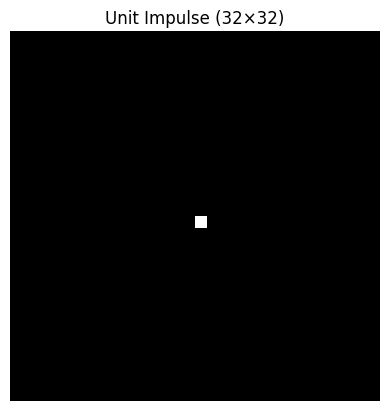

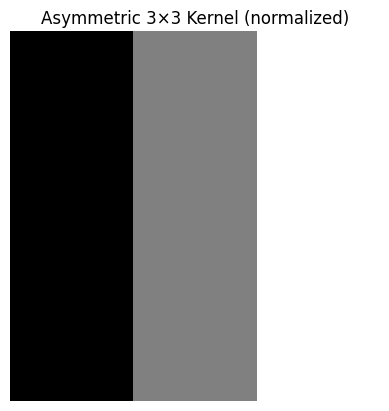

In [3]:
# 1) Build a 32×32 unit impulse at (16,16) and an asymmetric 3×3 kernel
H, W = 32, 32
impulse = np.zeros((H, W), dtype=np.float32)
impulse[16, 16] = 1.0

# Asymmetric kernel so that convolution (with flip) looks different from correlation (no flip)
K = np.array([[0,1,2],
              [0,1,2],
              [0,1,2]], dtype=np.float32)
K = K / K.sum()

# Save inputs (optional but helpful for reports)
import os
OUT = "q1_outputs"
os.makedirs(OUT, exist_ok=True)
plt.imsave(f"{OUT}/impulse.png", impulse, cmap="gray", vmin=0, vmax=1)
plt.imsave(f"{OUT}/kernel.png", K, cmap="gray")

# Quick visual check
plt.figure(); plt.imshow(impulse, cmap="gray", vmin=0, vmax=1); plt.title("Unit Impulse (32×32)"); plt.axis("off"); plt.show()
plt.figure(); plt.imshow(K, cmap="gray"); plt.title("Asymmetric 3×3 Kernel (normalized)"); plt.axis("off"); plt.show()

In [4]:
# 2) Minimal implementations: convolution (flip kernel) vs correlation (no flip)
def conv2d_same(img, ker):
    kh, kw = ker.shape
    ph, pw = kh//2, kw//2
    ker_flipped = np.flipud(np.fliplr(ker))
    padded = np.pad(img, ((ph, ph),(pw, pw)), mode="constant")
    out = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i,j] = np.sum(padded[i:i+kh, j:j+kw] * ker_flipped, dtype=np.float32)
    return out

def xcorr2d_same(img, ker):
    kh, kw = ker.shape
    ph, pw = kh//2, kw//2
    padded = np.pad(img, ((ph, ph),(pw, pw)), mode="constant")
    out = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i,j] = np.sum(padded[i:i+kh, j:j+kw] * ker, dtype=np.float32)
    return out

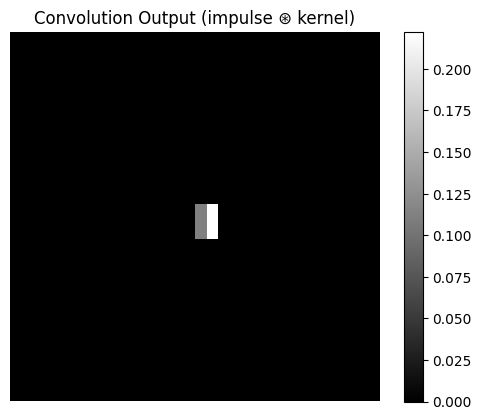

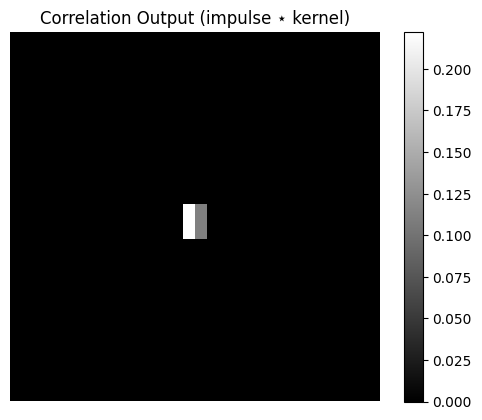

In [5]:
# 3) Compute & display results; also save images for the report
conv_out  = conv2d_same(impulse, K)   # true convolution (kernel flipped)
corr_out  = xcorr2d_same(impulse, K)  # correlation (no flip)

plt.imsave(f"{OUT}/conv_output.png", conv_out, cmap="gray")
plt.imsave(f"{OUT}/corr_output.png", corr_out, cmap="gray")

plt.figure(); plt.imshow(conv_out, cmap="gray"); plt.title("Convolution Output (impulse ⊛ kernel)"); plt.axis("off"); plt.colorbar(); plt.show()
plt.figure(); plt.imshow(corr_out, cmap="gray"); plt.title("Correlation Output (impulse ⋆ kernel)"); plt.axis("off"); plt.colorbar(); plt.show()

## Brief Analysis (Why this proves “convolution”)
Let $\delta$ be a 2D unit impulse. Convolution satisfies **impulse response**:
$(\delta \;\boldsymbol{\ast}\; h)(x,y) = h(x,y)$  
When the impulse is at (16,16), the output shows the **kernel located there**.  
Crucially, **convolution flips the kernel (180°)**, while **correlation does not**.  
Because our kernel is **asymmetric**, the two outputs are **visibly different**:
- **Convolution** reproduces the **flipped** kernel at (16,16).  
- **Correlation** reproduces the **unflipped** kernel at (16,16).  

This difference confirms our implementation truly performs **convolution**.

### How to Run
1. Open this notebook and **Run All code cell by cell**.